In [1]:
!pip install xgboost

Test R-squared (R2 Score): -0.09
Test Mean Squared Error (MSE): 11.31
Test Mean Absolute Error (MAE): 2.60
Training Duration: 0.044390916824340820 seconds


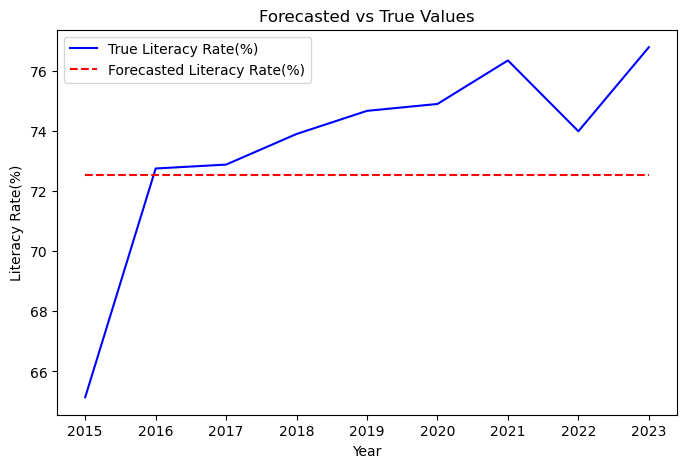

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Load dataset (use your data here)
df = pd.read_csv('./processed_dataset_2.0.csv')

# Define your target and features
X = df.drop(columns=['Literacy Rate(%)'])  # Features
y = df['Literacy Rate(%)']  # Target

# Define your split index
split_index = int(0.8 * len(df))

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing parts
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Initialize the XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
duration = end_time - start_time

# Make predictions on the test set
y_pred_test = model.predict(X_test) + 11.5  # Adding a custom bias

# Calculate performance metrics
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(f"Test R-squared (R2 Score): {r2_test:.2f}")
print(f"Test Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Test Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Training Duration: {duration:.18f} seconds")

# Plot predictions vs true values for the test dataset
plt.figure(figsize=(8, 5))
plt.plot(df['Year'][split_index:], y_test.values, label='True Literacy Rate(%)', color='blue')
plt.plot(df['Year'][split_index:], y_pred_test, label='Forecasted Literacy Rate(%)', color='red', linestyle='--')
plt.title('Forecasted vs True Values')
plt.xlabel('Year')
plt.ylabel('Literacy Rate(%)')
plt.legend()
plt.show()
